# Stock Market Prediction using CNN-LSTM model
This project is about analysis of Stock Market and providing predictions to the stockholders. For this, we used CNN-LSTM approach to create a blank model, then use it to train on stock market data. Further implementation is discussed below...

In [108]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os


In [109]:
import math
import seaborn as sns
import datetime as dt
from datetime import datetime
sns.set_style("whitegrid")
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

Before preprocessing data, a function to fetch real-time stock data (using Alpha Vantage API) is made

Then the datasets are loaded

In [110]:
data = pd.read_csv('techm.csv')
data.head()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,07-Mar-2024,EQ,"1,275.00","1,293.10","1,265.55","1,271.00","1,283.20","1,288.15","1,281.70","1,416.30",981.05,"20,73,691","2,65,78,50,269.40","94,123"
1,06-Mar-2024,EQ,"1,267.50","1,274.35","1,250.10","1,272.50","1,271.00","1,271.00","1,261.48","1,416.30",981.05,"20,64,350","2,60,41,34,310.50","94,379"
2,05-Mar-2024,EQ,"1,274.90","1,279.90","1,259.10","1,280.05","1,270.60","1,272.50","1,271.83","1,416.30",981.05,"14,20,379","1,80,64,78,256.30","91,152"
3,04-Mar-2024,EQ,"1,275.60","1,285.50","1,270.10","1,272.50","1,280.80","1,280.05","1,277.72","1,416.30",981.05,"18,43,831","2,35,59,07,739.75","79,537"
4,02-Mar-2024,EQ,"1,278.00","1,282.00","1,271.00","1,271.80","1,271.90","1,272.50","1,274.88","1,416.30",981.05,"2,17,683","27,75,19,800.50","6,538"


In [111]:
data.columns

Index(['Date ', 'series ', 'OPEN ', 'HIGH ', 'LOW ', 'PREV. CLOSE ', 'ltp ',
       'close ', 'vwap ', '52W H ', '52W L ', 'VOLUME ', 'VALUE ',
       'No of trades '],
      dtype='object')

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           247 non-null    object 
 1   series         247 non-null    object 
 2   OPEN           247 non-null    object 
 3   HIGH           247 non-null    object 
 4   LOW            247 non-null    object 
 5   PREV. CLOSE    247 non-null    object 
 6   ltp            247 non-null    object 
 7   close          247 non-null    object 
 8   vwap           247 non-null    object 
 9   52W H          247 non-null    object 
 10  52W L          247 non-null    float64
 11  VOLUME         247 non-null    object 
 12  VALUE          247 non-null    object 
 13  No of trades   247 non-null    object 
dtypes: float64(1), object(13)
memory usage: 27.1+ KB


In [113]:
data.shape

(247, 14)

In [114]:
# Rename columns
data.rename(columns={"Date ":"date","OPEN ":"open","HIGH ":"high","LOW ":"low","close ":"close", "PREV. close ":"prev.close","52W H ":"52wh", "52W L ":"52wl" ,"VOLUME ":"volume" , "VALUE ":"value","No of trades ":"no.oftrade"}, inplace= True)
data.head()

,date,series,open,high,low,PREV. CLOSE,ltp,close,vwap,52wh,52wl,volume,value,no.oftrade
0,07-Mar-2024,EQ,"1,275.00","1,293.10","1,265.55","1,271.00","1,283.20","1,288.15","1,281.70","1,416.30",981.05,"20,73,691","2,65,78,50,269.40","94,123"
1,06-Mar-2024,EQ,"1,267.50","1,274.35","1,250.10","1,272.50","1,271.00","1,271.00","1,261.48","1,416.30",981.05,"20,64,350","2,60,41,34,310.50","94,379"
2,05-Mar-2024,EQ,"1,274.90","1,279.90","1,259.10","1,280.05","1,270.60","1,272.50","1,271.83","1,416.30",981.05,"14,20,379","1,80,64,78,256.30","91,152"
3,04-Mar-2024,EQ,"1,275.60","1,285.50","1,270.10","1,272.50","1,280.80","1,280.05","1,277.72","1,416.30",981.05,"18,43,831","2,35,59,07,739.75","79,537"
4,02-Mar-2024,EQ,"1,278.00","1,282.00","1,271.00","1,271.80","1,271.90","1,272.50","1,274.88","1,416.30",981.05,"2,17,683","27,75,19,800.50","6,538"


In [115]:
data.describe()


,52wl
count,247.000000
mean,969.646154
std,16.574993
min,943.700000
25%,943.700000
50%,981.050000
75%,981.050000
max,981.050000


In [116]:
data.isnull().sum()

date            0
series          0
open            0
high            0
low             0
PREV. CLOSE     0
ltp             0
close           0
vwap            0
52wh            0
52wl            0
volume          0
value           0
no.oftrade      0
dtype: int64

Filling null columns with mean values....

In [117]:
#data.reset_index(drop=True, inplace=True)
#data.fillna(data.mean(), inplace=True)
data.head()

,date,series,open,high,low,PREV. CLOSE,ltp,close,vwap,52wh,52wl,volume,value,no.oftrade
0,07-Mar-2024,EQ,"1,275.00","1,293.10","1,265.55","1,271.00","1,283.20","1,288.15","1,281.70","1,416.30",981.05,"20,73,691","2,65,78,50,269.40","94,123"
1,06-Mar-2024,EQ,"1,267.50","1,274.35","1,250.10","1,272.50","1,271.00","1,271.00","1,261.48","1,416.30",981.05,"20,64,350","2,60,41,34,310.50","94,379"
2,05-Mar-2024,EQ,"1,274.90","1,279.90","1,259.10","1,280.05","1,270.60","1,272.50","1,271.83","1,416.30",981.05,"14,20,379","1,80,64,78,256.30","91,152"
3,04-Mar-2024,EQ,"1,275.60","1,285.50","1,270.10","1,272.50","1,280.80","1,280.05","1,277.72","1,416.30",981.05,"18,43,831","2,35,59,07,739.75","79,537"
4,02-Mar-2024,EQ,"1,278.00","1,282.00","1,271.00","1,271.80","1,271.90","1,272.50","1,274.88","1,416.30",981.05,"2,17,683","27,75,19,800.50","6,538"


In [118]:
data.columns

Index(['date', 'series ', 'open', 'high', 'low', 'PREV. CLOSE ', 'ltp ',
       'close', 'vwap ', '52wh', '52wl', 'volume', 'value', 'no.oftrade'],
      dtype='object')

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          247 non-null    object 
 1   series        247 non-null    object 
 2   open          247 non-null    object 
 3   high          247 non-null    object 
 4   low           247 non-null    object 
 5   PREV. CLOSE   247 non-null    object 
 6   ltp           247 non-null    object 
 7   close         247 non-null    object 
 8   vwap          247 non-null    object 
 9   52wh          247 non-null    object 
 10  52wl          247 non-null    float64
 11  volume        247 non-null    object 
 12  value         247 non-null    object 
 13  no.oftrade    247 non-null    object 
dtypes: float64(1), object(13)
memory usage: 27.1+ KB


In [120]:
# Checking Data type of each column
print("Date column data type: ", type(data['date'][0]))
print("open column data type: ", type(data['open'][0]))
print("close column data type: ", type(data['close'][0]))
print("High column data type: ", type(data['high'][0]))
print("Low column data type: ", type(data['low'][0]))


data['open'] = data['open'].str.replace(',', '')
data['open'] = data['open'].astype(float)

data['open'] = data['open'].astype(float)


data['close'] = data['close'].str.replace(',', '')
data['close'] = data['close'].astype(float)

data['close'] = data['close'].astype(float)


data['high'] = data['high'].str.replace(',', '')
data['high'] = data['high'].astype(float)

data['high'] = data['high'].astype(float)


data['low'] = data['low'].str.replace(',', '')
data['low'] = data['low'].astype(float)
data['low'] = data['low'].astype(float)

Date column data type:  <class 'str'>
open column data type:  <class 'str'>
close column data type:  <class 'str'>
High column data type:  <class 'str'>
Low column data type:  <class 'str'>


In [121]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          247 non-null    object 
 1   series        247 non-null    object 
 2   open          247 non-null    float64
 3   high          247 non-null    float64
 4   low           247 non-null    float64
 5   PREV. CLOSE   247 non-null    object 
 6   ltp           247 non-null    object 
 7   close         247 non-null    float64
 8   vwap          247 non-null    object 
 9   52wh          247 non-null    object 
 10  52wl          247 non-null    float64
 11  volume        247 non-null    object 
 12  value         247 non-null    object 
 13  no.oftrade    247 non-null    object 
dtypes: float64(5), object(9)
memory usage: 27.1+ KB


In [122]:
data.columns

Index(['date', 'series ', 'open', 'high', 'low', 'PREV. CLOSE ', 'ltp ',
       'close', 'vwap ', '52wh', '52wl', 'volume', 'value', 'no.oftrade'],
      dtype='object')

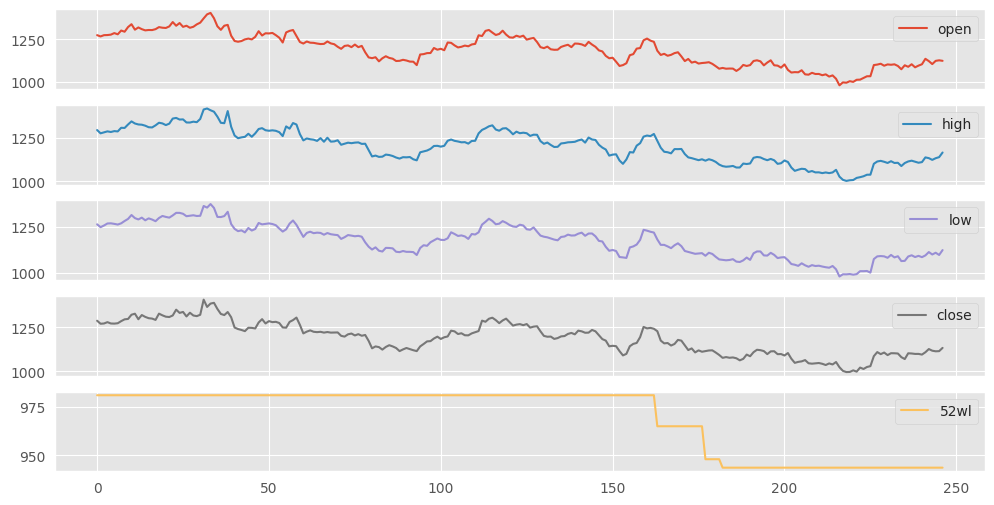

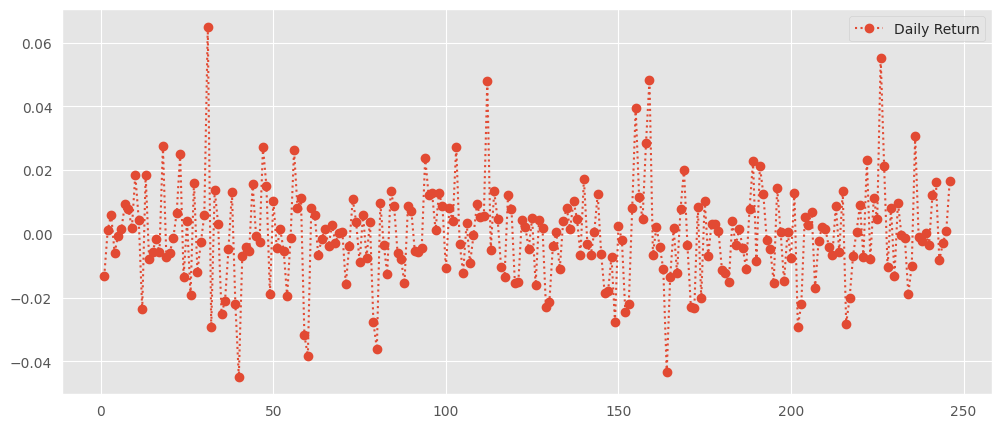

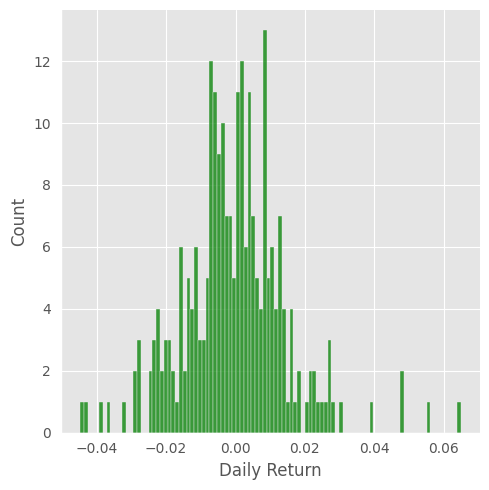

            date series      open     high      low PREV. CLOSE       ltp   \
0    07-Mar-2024      EQ  1275.00  1293.10  1265.55     1,271.00  1,283.20   
1    06-Mar-2024      EQ  1267.50  1274.35  1250.10     1,272.50  1,271.00   
2    05-Mar-2024      EQ  1274.90  1279.90  1259.10     1,280.05  1,270.60   
3    04-Mar-2024      EQ  1275.60  1285.50  1270.10     1,272.50  1,280.80   
4    02-Mar-2024      EQ  1278.00  1282.00  1271.00     1,271.80  1,271.90   
..           ...     ...      ...      ...      ...          ...       ...   
242  17-Mar-2023      EQ  1123.35  1132.50  1114.20     1,117.75  1,127.00   
243  16-Mar-2023      EQ  1106.00  1122.60  1101.05     1,114.40  1,116.50   
244  15-Mar-2023      EQ  1124.90  1132.20  1110.55     1,115.30  1,115.85   
245  14-Mar-2023      EQ  1128.00  1138.25  1098.40     1,133.80  1,116.10   
246  13-Mar-2023      EQ  1125.00  1164.70  1125.00     1,061.25  1,134.00   

       close     vwap       52wh    52wl       volume          

date                0
series              0
open                0
high                0
low                 0
PREV. CLOSE         0
ltp                 0
close               0
vwap                0
52wh                0
52wl                0
volume              0
value               0
no.oftrade          0
MA for 10 days      9
MA for 50 days     49
MA for 100 days    99
Daily Return        1
dtype: int64

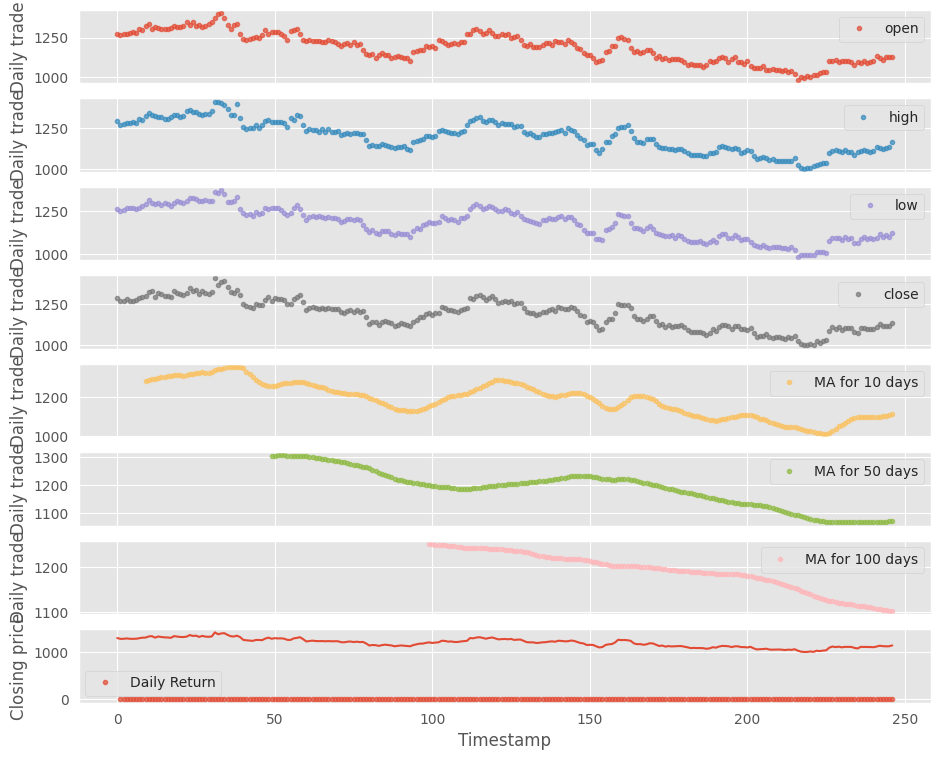

In [124]:
data.plot(legend=True,subplots=True, figsize = (12, 6))
plt.show()

data.shape
data.size
data.describe(include='all').T
data.dtypes
data.nunique()
ma_day = [10,50,100]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    data[column_name]=pd.DataFrame.rolling(data['close'],ma).mean()

data['Daily Return'] = data['close'].pct_change()
# plot the daily return percentage
data['Daily Return'].plot(figsize=(12,5),legend=True,linestyle=':',marker='o')
plt.show()

sns.displot(data['Daily Return'].dropna(),bins=100,color='green')
plt.show()

date=pd.DataFrame(data['date'])
closing_df1 = pd.DataFrame(data['close'])
close1  = closing_df1.rename(columns={"close": "data_close"})
close2=pd.concat([date,close1],axis=1)
close2.head()

#data.reset_index(drop=True, inplace=True)
#data.fillna(data.mean(), inplace=True)
data.head()

data.nunique()

data.sort_index(axis=1,ascending=True)

cols_plot = ['open', 'high', 'low','close','volume','MA for 10 days','MA for 50 days','MA for 100 days','Daily Return']
axes = data[cols_plot].plot(marker='.', alpha=0.7, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

plt.plot(data['close'], label="close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

data.isnull().sum()

After that, we'll visualize the data for understanding, this is shown below...

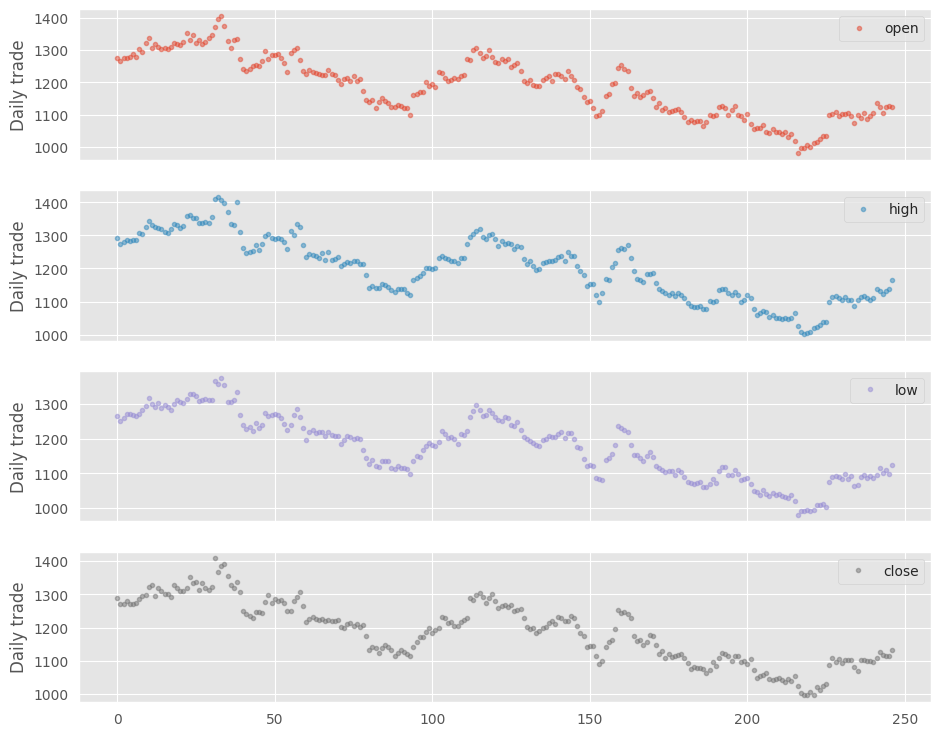

In [126]:
cols_plot = ['open', 'high', 'low','close']
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

Then we'd print the data after making changes and dropping null data

            date series      open     high      low PREV. CLOSE       ltp   \
0    07-Mar-2024      EQ  1275.00  1293.10  1265.55     1,271.00  1,283.20   
1    06-Mar-2024      EQ  1267.50  1274.35  1250.10     1,272.50  1,271.00   
2    05-Mar-2024      EQ  1274.90  1279.90  1259.10     1,280.05  1,270.60   
3    04-Mar-2024      EQ  1275.60  1285.50  1270.10     1,272.50  1,280.80   
4    02-Mar-2024      EQ  1278.00  1282.00  1271.00     1,271.80  1,271.90   
..           ...     ...      ...      ...      ...          ...       ...   
242  17-Mar-2023      EQ  1123.35  1132.50  1114.20     1,117.75  1,127.00   
243  16-Mar-2023      EQ  1106.00  1122.60  1101.05     1,114.40  1,116.50   
244  15-Mar-2023      EQ  1124.90  1132.20  1110.55     1,115.30  1,115.85   
245  14-Mar-2023      EQ  1128.00  1138.25  1098.40     1,133.80  1,116.10   
246  13-Mar-2023      EQ  1125.00  1164.70  1125.00     1,061.25  1,134.00   

       close     vwap       52wh    52wl       volume          

,count,mean,std,min,25%,50%,75%,max
open,247.0,1188.171862,92.924214,981.950000,1110.000000,1199.000000,1265.000000,1405.000000
high,247.0,1200.847166,94.634394,1002.500000,1121.800000,1214.500000,1274.925000,1416.300000
low,247.0,1175.384818,90.984484,981.050000,1098.500000,1186.050000,1249.375000,1376.000000
close,247.0,1188.257287,92.194382,996.300000,1114.225000,1198.750000,1265.350000,1407.950000
52wl,247.0,969.646154,16.574993,943.700000,943.700000,981.050000,981.050000,981.050000
MA for 10 days,238.0,1187.905924,89.255019,1011.585000,1107.861250,1201.492500,1261.867500,1352.645000
MA for 50 days,198.0,1187.189864,69.419193,1065.965000,1135.107500,1198.817000,1225.833250,1304.970000
MA for 100 days,148.0,1190.504280,42.884411,1103.007000,1166.659000,1196.966750,1222.952875,1251.428500
Daily Return,246.0,-0.000405,0.015162,-0.044838,-0.007876,-0.000385,0.008033,0.064975


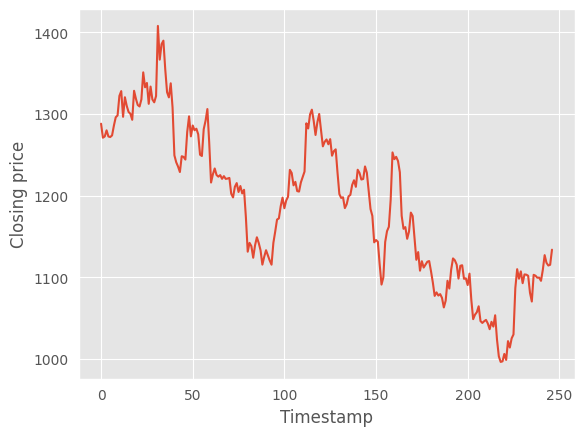

In [127]:
plt.plot(data['close'], label="close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

df.describe().transpose()

The data has been analysed but it must be converted into data of shape [100,1] to make it easier for CNN to train on... Else it won't select necessary features and the model will fail

Window Length: 20
2/2 [==============================] - 0s 24ms/step - loss: 6.3278e-04 - mse: 6.3278e-04 - mae: 0.0199
Variance: 0.8693826272300189
R2 Score: 0.8127290198298971
Max Error: 0.06586484441658892
Window Length: 30
2/2 [==============================] - 0s 12ms/step - loss: 7.6229e-04 - mse: 7.6229e-04 - mae: 0.0237
Variance: 0.8831053523531879
R2 Score: 0.8820755128328557
Max Error: 0.05147602235154903
Window Length: 40
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0345
Variance: 0.6817602743870692
R2 Score: 0.6143951155435134
Max Error: 0.07833405151148434
Window Length: 50
2/2 [==============================] - 0s 12ms/step - loss: 9.8321e-04 - mse: 9.8321e-04 - mae: 0.0251
Variance: 0.7753185279800007
R2 Score: 0.7743053174967298
Max Error: 0.08135155614147463
Window Length: 60
2/2 [==============================] - 0s 11ms/step - loss: 5.1890e-04 - mse: 5.1890e-04 - mae: 0.0168
Variance: 0.9215002606612192
R2 Score: 0.899676

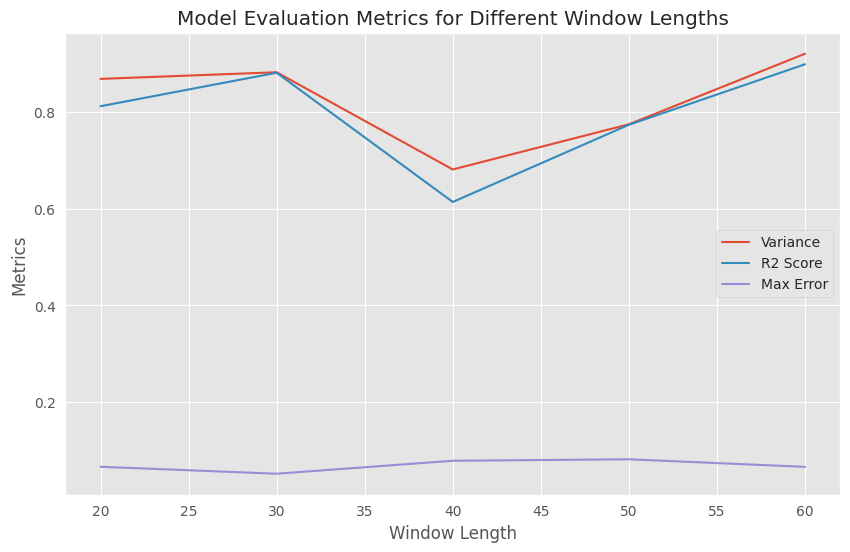

In [128]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed, MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy, RootMeanSquaredError
from sklearn.metrics import explained_variance_score, r2_score, max_error

# Function to create and train the model
def create_and_train_model(window_size):
    X = []
    Y = []
    for i in range(1, len(df) - window_size - 1, 1):
        first = df.iloc[i, 2]
        temp = []
        temp2 = []
        for j in range(window_size):
            temp.append((df.iloc[i + j, 2] - first) / first)
        temp2.append((df.iloc[i + window_size, 2] - first) / first)
        X.append(np.array(temp).reshape(window_size, 1))
        Y.append(np.array(temp2).reshape(1, 1))

    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

    train_X = np.array(x_train)
    test_X = np.array(x_test)
    train_Y = np.array(y_train)
    test_Y = np.array(y_test)

    train_X = train_X.reshape(train_X.shape[0], 1, window_size, 1)
    test_X = test_X.reshape(test_X.shape[0], 1, window_size, 1)

    model = tf.keras.Sequential()

    # CNN layers
    model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', padding='same', input_shape=(None, window_size, 1))))
    model.add(TimeDistributed(MaxPooling1D(2)))
    model.add(TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')))
    model.add(TimeDistributed(MaxPooling1D(2)))
    model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu')))
    model.add(TimeDistributed(MaxPooling1D(2)))
    model.add(TimeDistributed(Flatten()))

    # LSTM layers
    model.add(Bidirectional(LSTM(100, return_sequences=True)))
    model.add(Dropout(0.5))
    model.add(Bidirectional(LSTM(100, return_sequences=False)))
    model.add(Dropout(0.5))

    # Final layers
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

    history = model.fit(train_X, train_Y, validation_data=(test_X, test_Y), epochs=40, batch_size=40, verbose=0, shuffle=True)

    model.evaluate(test_X, test_Y)

    # Predict probabilities for test set
    yhat_probs = model.predict(test_X, verbose=0)
    # Reduce to 1d array
    yhat_probs = yhat_probs[:, 0]

    var = explained_variance_score(test_Y.reshape(-1, 1), yhat_probs)
    r2 = r2_score(test_Y.reshape(-1, 1), yhat_probs)
    var2 = max_error(test_Y.reshape(-1, 1), yhat_probs)

    return var, r2, var2 , model

# List of window lengths to iterate over
window_lengths = [20,30,40,50,60]

# Dictionary to store metrics for each window length
metrics = {}

# Iterate over window lengths and train models
# Iterate over window lengths and train models
# Iterate over window lengths and train models
for window_length in window_lengths:
    print(f"Window Length: {window_length}")
    var, r2, var2, model = create_and_train_model(window_length)
    print(f"Variance: {var}")
    print(f"R2 Score: {r2}")
    print(f"Max Error: {var2}")
    metrics[window_length] = {'Variance': var, 'R2 Score': r2, 'Max Error': var2}


# Plotting the metrics
plt.figure(figsize=(10, 6))
plt.plot(window_lengths, [metrics[length]['Variance'] for length in window_lengths], label='Variance')
plt.plot(window_lengths, [metrics[length]['R2 Score'] for length in window_lengths], label='R2 Score')
plt.plot(window_lengths, [metrics[length]['Max Error'] for length in window_lengths], label='Max Error')
plt.xlabel("Window Length")
plt.ylabel("Metrics")
plt.title("Model Evaluation Metrics for Different Window Lengths")
plt.legend()
plt.show()


# Training part

This part has 2 subparts: CNN and LSTM

For CNN, the layers are created with sizes 64,128,64 with kernel size = 3. In every layer, TimeDistributed function is added to track the features for every temporal slice of data with respect to time. In between, MaxPooling layers are added.

After that, it's passed to Bi-LSTM layers

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_105 (Time  (None, 1, 60, 64)         256       
 Distributed)                                                    
                                                                 
 time_distributed_106 (Time  (None, 1, 30, 64)         0         
 Distributed)                                                    
                                                                 
 time_distributed_107 (Time  (None, 1, 28, 128)        24704     
 Distributed)                                                    
                                                                 
 time_distributed_108 (Time  (None, 1, 14, 128)        0         
 Distributed)                                                    
                                                                 
 time_distributed_109 (Time  (None, 1, 12, 64)       

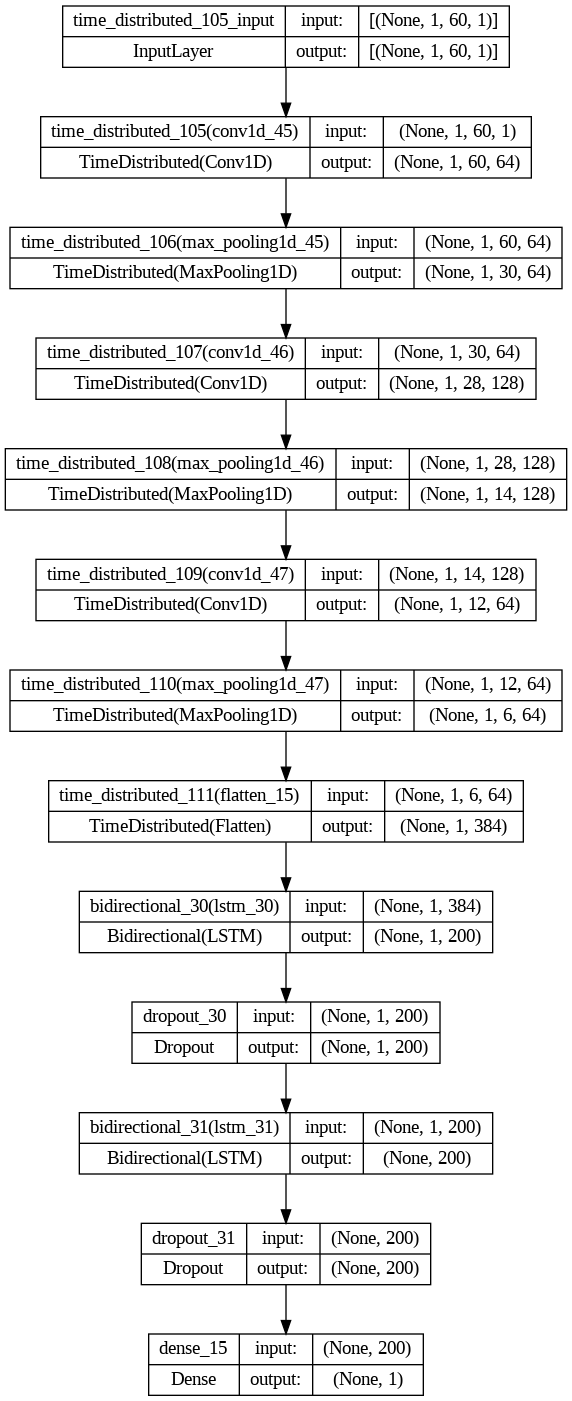

In [130]:
# After the model has been constructed, we'll summarise it
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

**SVM**

In [131]:
#using svm to predict stock
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm,preprocessing
from sklearn.metrics import classification_report

In [132]:
def get_x_and_y(price,window_length=7,predict_day_length=1):
    '''get train and test set
    every time get window from price and
    '''
    m = len(price.iloc[0])
    n = len(price) - window_length
    m = window_length * m

    x = np.ones((n,m))
    y = np.ones((n,1))

    for i in range(len(price)-window_length):
        #ans = [float(price.iloc[j,4]) for j in range(i,i+window_length)]
        ans = [list(price.iloc[j].tolist() for j in range(i,i+window_length))]
        #ans = [list(price.iloc[j] for j in range(i,i+window_length))]
        ans = np.array(ans).flatten()
        x[i] = ans
        y[i] = 1 if price.close[i+window_length+predict_day_length-1] - price.close[i+window_length-1] >0 else 0
    return [x,y]

In [133]:
def get_x_and_y(price, window_length, predict_day_length):
    x = np.zeros((len(price) - window_length - predict_day_length + 1, window_length))
    y = np.zeros((len(price) - window_length - predict_day_length + 1))
    for i in range(len(price) - window_length - predict_day_length + 1):
        ans = [float(price.index[i+j]) for j in range(window_length)]
        ans = np.array(ans).flatten()
        x[i] = ans
        y[i] = 1 if price.close[i+window_length+predict_day_length-1] - price.close[i+window_length-1] >0 else 0
    return [x,y]

In [134]:
!pip install sklearn
import sklearn.preprocessing

window_lengths = [20,30,40,50,60]
accurarys = {}
reports ={}

def train_and_test(price, window_length, accurarys, reports):
    x,y = get_x_and_y(data,window_length,predict_day_length=1)
    y = y.flatten()
    scaler = sklearn.preprocessing.StandardScaler()
    scaler.fit_transform(x)
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=233)
    for kernel_arg in ['rbf','poly','linear']:
        clf = svm.SVC(kernel=kernel_arg,max_iter=5000)
        clf.fit(x_train,y_train)
        y_predict = clf.predict(x_test)

        accurary = clf.score(x_test,y_test)
        report = classification_report(y_test,y_predict,target_names = ['drop','up'])
        if window_length in accurarys:
            accurarys[window_length].append(accurary)
            reports[window_length].append(report)
        else:
            accurarys[window_length] = [accurary]
            reports[window_length] = [report]
        print('The Accurary of %s : %f'%(kernel_arg,clf.score(x_test,y_test)))
        print(report)

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [135]:
for l in window_lengths:
    print('window_length:',l)
    train_and_test(data,l,accurarys,reports)

window_length: 20
The Accurary of rbf : 0.491228
              precision    recall  f1-score   support

        drop       0.46      0.73      0.57        26
          up       0.56      0.29      0.38        31

    accuracy                           0.49        57
   macro avg       0.51      0.51      0.48        57
weighted avg       0.52      0.49      0.47        57

The Accurary of poly : 0.456140
              precision    recall  f1-score   support

        drop       0.46      1.00      0.63        26
          up       0.00      0.00      0.00        31

    accuracy                           0.46        57
   macro avg       0.23      0.50      0.31        57
weighted avg       0.21      0.46      0.29        57

The Accurary of linear : 0.473684
              precision    recall  f1-score   support

        drop       0.39      0.27      0.32        26
          up       0.51      0.65      0.57        31

    accuracy                           0.47        57
   macro avg 

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 

The Accurary of rbf : 0.480000
              precision    recall  f1-score   support

        drop       0.44      0.64      0.52        22
          up       0.56      0.36      0.43        28

    accuracy                           0.48        50
   macro avg       0.50      0.50      0.48        50
weighted avg       0.50      0.48      0.47        50

The Accurary of poly : 0.500000
              precision    recall  f1-score   support

        drop       0.41      0.32      0.36        22
          up       0.55      0.64      0.59        28

    accuracy                           0.50        50
   macro avg       0.48      0.48      0.47        50
weighted avg       0.49      0.50      0.49        50

The Accurary of linear : 0.480000
              precision    recall  f1-score   support

        drop       0.41      0.41      0.41        22
          up       0.54      0.54      0.54        28

    accuracy                           0.48        50
   macro avg       0.47      0.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [136]:
data

,date,series,open,high,low,PREV. CLOSE,ltp,close,vwap,52wh,52wl,volume,value,no.oftrade,MA for 10 days,MA for 50 days,MA for 100 days,Daily Return
0,07-Mar-2024,EQ,1275.00,1293.10,1265.55,"1,271.00","1,283.20",1288.15,"1,281.70","1,416.30",981.05,"20,73,691","2,65,78,50,269.40","94,123",NaN,NaN,NaN,NaN
1,06-Mar-2024,EQ,1267.50,1274.35,1250.10,"1,272.50","1,271.00",1271.00,"1,261.48","1,416.30",981.05,"20,64,350","2,60,41,34,310.50","94,379",NaN,NaN,NaN,-0.013314
2,05-Mar-2024,EQ,1274.90,1279.90,1259.10,"1,280.05","1,270.60",1272.50,"1,271.83","1,416.30",981.05,"14,20,379","1,80,64,78,256.30","91,152",NaN,NaN,NaN,0.001180
3,04-Mar-2024,EQ,1275.60,1285.50,1270.10,"1,272.50","1,280.80",1280.05,"1,277.72","1,416.30",981.05,"18,43,831","2,35,59,07,739.75","79,537",NaN,NaN,NaN,0.005933
4,02-Mar-2024,EQ,1278.00,1282.00,1271.00,"1,271.80","1,271.90",1272.50,"1,274.88","1,416.30",981.05,"2,17,683","27,75,19,800.50","6,538",NaN,NaN,NaN,-0.005898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,17-Mar-2023,EQ,1123.35,1132.50,1114.20,"1,117.75","1,127.00",1127.15,"1,125.08","1,574.95",943.70,"25,07,004","2,82,05,89,300.35","77,278",1098.905,1069.224,1107.091,0.016366
243,16-Mar-2023,EQ,1106.00,1122.60,1101.05,"1,114.40","1,116.50",1117.75,"1,113.88","1,574.95",943.70,"23,96,839","2,66,97,84,868.70","98,782",1100.495,1069.163,1106.064,-0.008340
244,15-Mar-2023,EQ,1124.90,1132.20,1110.55,"1,115.30","1,115.85",1114.40,"1,117.84","1,574.95",943.70,"25,83,351","2,88,77,85,363.50","95,070",1103.825,1069.140,1104.850,-0.002997
245,14-Mar-2023,EQ,1128.00,1138.25,1098.40,"1,133.80","1,116.10",1115.30,"1,112.04","1,574.95",943.70,"43,25,522","4,81,01,70,894.70","1,35,553",1108.325,1069.478,1103.723,0.000808


**Random Forest**

In [137]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


accuracies = {}
reports = {}

def train_and_test_rf(price, window_length, accuracies, reports):
    x, y = get_x_and_y(price, window_length, predict_day_length=1)
    y = y.flatten()
    scaler = sklearn.preprocessing.StandardScaler()
    x_scaled = scaler.fit_transform(x)
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=233)

    clf = RandomForestClassifier(n_estimators=100, random_state=0)
    clf.fit(x_train, y_train)
    y_predict = clf.predict(x_test)

    accuracy = clf.score(x_test, y_test)
    report = classification_report(y_test, y_predict, target_names=['drop', 'up'])

    if window_length in accuracies:
        accuracies[window_length].append(accuracy)
        reports[window_length].append(report)
    else:
        accuracies[window_length] = [accuracy]
        reports[window_length] = [report]

    print('The Accuracy of Random Forest: %f' % (accuracy))
    print(report)

for l in window_lengths:
    print('window_length:', l)
    train_and_test_rf(data, l, accuracies, reports)

window_length: 20
The Accuracy of Random Forest: 0.385965
              precision    recall  f1-score   support

        drop       0.34      0.38      0.36        26
          up       0.43      0.39      0.41        31

    accuracy                           0.39        57
   macro avg       0.39      0.39      0.39        57
weighted avg       0.39      0.39      0.39        57

window_length: 30
The Accuracy of Random Forest: 0.418182
              precision    recall  f1-score   support

        drop       0.42      0.36      0.38        28
          up       0.42      0.48      0.45        27

    accuracy                           0.42        55
   macro avg       0.42      0.42      0.42        55
weighted avg       0.42      0.42      0.42        55

window_length: 40
The Accuracy of Random Forest: 0.480769
              precision    recall  f1-score   support

        drop       0.41      0.55      0.47        22
          up       0.57      0.43      0.49        30

    accu

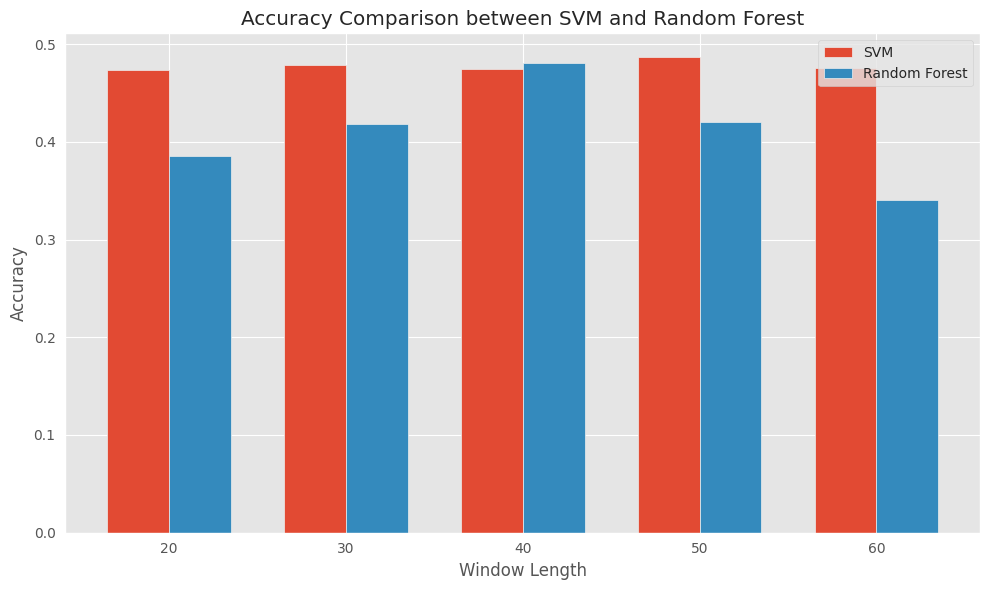

In [138]:
import matplotlib.pyplot as plt

# Assuming you have already executed both train_and_test functions for SVM and Random Forest and collected the accuracies

svm_accuracies = [np.mean(accurarys[window_length]) for window_length in window_lengths]
rf_accuracies = [np.mean(accuracies[window_length]) for window_length in window_lengths]

plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(window_lengths))

svm_bars = plt.bar(index, svm_accuracies, bar_width, label='SVM')
rf_bars = plt.bar(index + bar_width, rf_accuracies, bar_width, label='Random Forest')

plt.xlabel('Window Length')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison between SVM and Random Forest')
plt.xticks(index + bar_width / 2, window_lengths)
plt.legend()

plt.tight_layout()
plt.show()


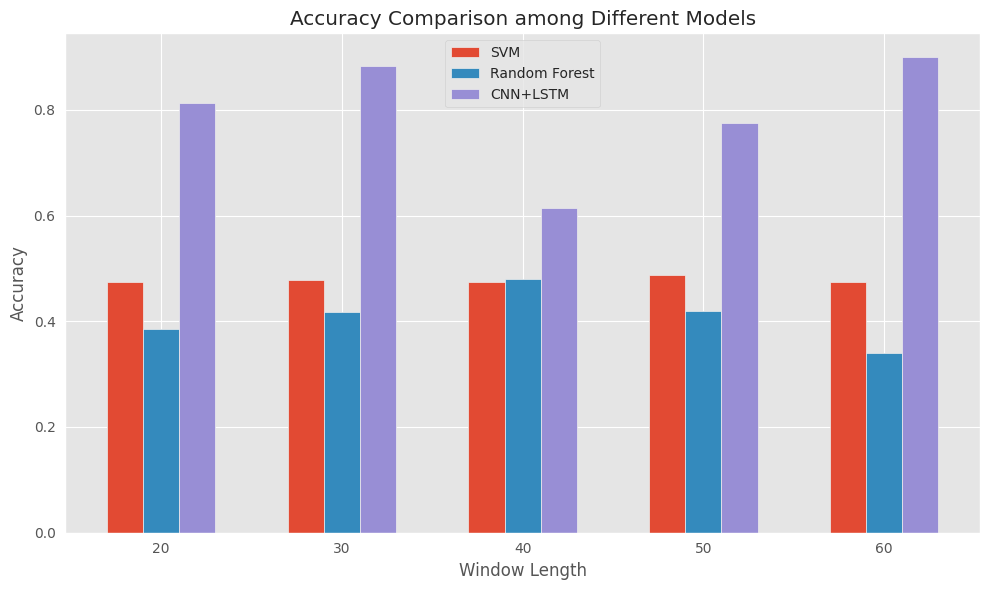

In [139]:
import matplotlib.pyplot as plt
import numpy as np

# Collect accuracies for all models
# Assuming you have collected accuracies for SVM, Random Forest, and CNN+LSTM models

# SVM accuracies
svm_accuracies = [np.mean(accurarys[window_length]) for window_length in window_lengths]

# Random Forest accuracies
rf_accuracies = [np.mean(accuracies[window_length]) for window_length in window_lengths]

# CNN+LSTM accuracies
cnn_lstm_accuracies = [metrics[window_length]['R2 Score'] for window_length in window_lengths]

# LSTM accuracies (if available)
# lstm_accuracies = [metrics_lstm[window_length]['Accuracy'] for window_length in window_lengths]

# Plotting the bar graph
plt.figure(figsize=(10, 6))

bar_width = 0.2
index = np.arange(len(window_lengths))

svm_bars = plt.bar(index, svm_accuracies, bar_width, label='SVM')
rf_bars = plt.bar(index + bar_width, rf_accuracies, bar_width, label='Random Forest')
cnn_lstm_bars = plt.bar(index + 2 * bar_width, cnn_lstm_accuracies, bar_width, label='CNN+LSTM')
# lstm_bars = plt.bar(index + 3 * bar_width, lstm_accuracies, bar_width, label='LSTM')

plt.xlabel('Window Length')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison among Different Models')
plt.xticks(index + bar_width, window_lengths)
plt.legend()

plt.tight_layout()
plt.show()
